In [1]:
# dependencies
import numpy as np
from scipy.stats import entropy
from matplotlib import pyplot as plt

# import embo
from embo import empirical_bottleneck

# matplotlib configuration
default_figsize = np.array((8.0, 6.8))/2.54 # division is to convert to inches
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['figure.figsize'] = default_figsize
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[plt.get_cmap('Dark2',8)(k/7) for k in range(8)]) 

In [2]:
def IB_plot(x,y,ax,title,ax2=None,**kw):
    """Compute and plot an IB curve"""
    i_p,i_f,beta,mi,h_p,h_f = empirical_bottleneck(x,y,return_entropies=True,**kw)
    ax.plot(np.arange(0,(mi*1.5)+.1,.1),np.arange(0,(mi*1.5)+.1,.1),color='dimgray',linewidth=0.7)
    ax.plot([0, h_p], [mi, mi], linestyle='--', color='tab:red') # upper bound for I(M:Y) is MI(X:Y)
    ax.plot([h_p,h_p], [0, mi], linestyle='--', color='tab:red') # upper bound for I(M:X) is H(X), given that M has the same cardinality as X
    ax.plot(i_p,i_f,color='tab:red',lw=2)
    ax.set_ylim(-0.01,(mi*1.1)+.1)
    ax.set_xlim(-.01,(h_p*1.1)+.1)
    ax.set_title('IB Curve - {}'.format(title))
    ax.set_ylabel("$I(M:Y)$ (bit)")
    ax.set_xlabel("$I(M:X)$ (bit)")
    if not ax2 is None:
        ax2.plot(beta,i_p,label="$I(M:X)$ (bit)",marker='o',markersize=4)
        ax2.plot(beta,i_f,label="$I(M:Y)$ (bit)",marker='o',markersize=4)
        ax2.legend()
        ax2.set_title('Information vs beta - {}'.format(title))
        ax2.set_xlabel('beta')
        ax2.set_ylabel('Information (bit)')

# Fake data with arrays of two symbols
x2 = np.array([1,0,1,0,1,0,1,0,1,0])
y2 = np.array([0,0,0,1,0,1,0,1,0,1])

# Fake data with arrays of four symbols
x6 = np.array([0,1,2,3,0,1,2,3,])
y6 = np.array([0,1,0,3,0,0,2,3,])

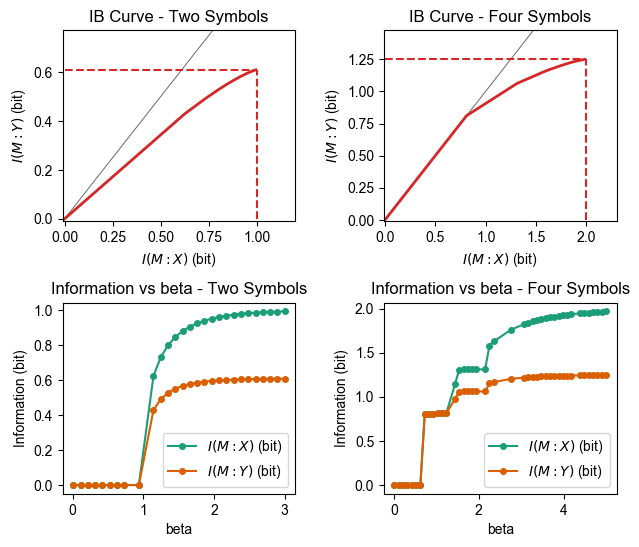

In [3]:
# make plots
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=2*default_figsize, constrained_layout=True)
IB_plot(x2,y2,ax[0,0],ax2=ax[1,0],maxbeta=3,numbeta=30,title="Two Symbols")
IB_plot(x6,y6,ax[0,1],ax2=ax[1,1],maxbeta=5,numbeta=50,title="Four Symbols")